In [1]:
import lmdb
import cv2 as cv
import numpy as np
from turbojpeg import TurboJPEG, TJPF_GRAY, TJSAMP_GRAY, TJFLAG_PROGRESSIVE, TJFLAG_FASTUPSAMPLE, TJFLAG_FASTDCT
jpeg = TurboJPEG()

In [2]:
env = lmdb.open('../data/LRS2-preprocess/abab_lmdb', readonly=True, lock=False)
txn = env.begin()

Error: ../data/LRS2-preprocess/abab_lmdb: ϵͳ�Ҳ���ָ����·����


In [3]:
id = 'pretrain-5536968329746298779-00006'


In [10]:
frames =[]
for f_id in range(50):
    f_name = f'{id}-{f_id}'
    key = f_name.encode()
    value = txn.get(key)
    frames.append(jpeg.decode(value, pixel_format=TJPF_GRAY))
frames = np.stack(frames, axis=0)

In [11]:
frames.dtype, frames.shape


(dtype('uint8'), (50, 112, 112, 1))

In [30]:
import matplotlib.pyplot as plt
from torchvision.transforms import RandomCrop, CenterCrop
import torch

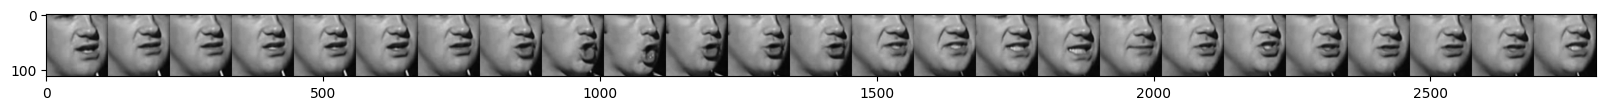

In [31]:
plt.figure(figsize=(20, 10))
plt.imshow(np.concatenate(frames[::2],1), cmap='gray')

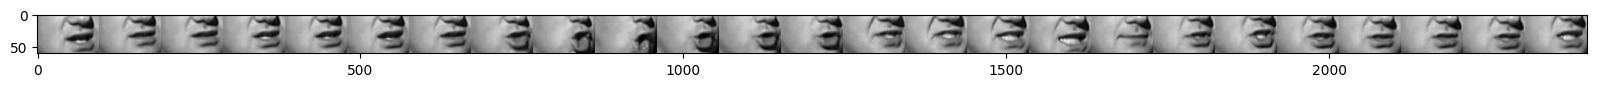

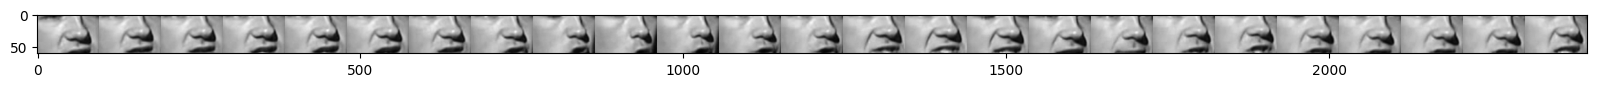

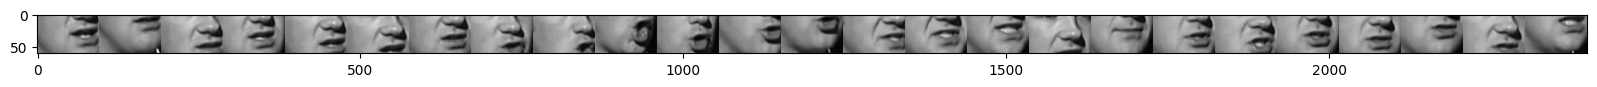

In [45]:
torch_frames = torch.from_numpy(frames).permute(0, 3, 1, 2).float()

size = (60, 96)

cropped = RandomCrop(size)
cropped_frames = cropped(torch_frames)

center = CenterCrop(size)
center_frames = center(torch_frames)

random_frames = []
for frame in torch_frames:
    random_frames.append(cropped(frame))


plt.figure(figsize=(20, 5))
plt.imshow(np.concatenate(center_frames[::2].permute(0, 2, 3, 1).numpy(),1), cmap='gray')
plt.figure(figsize=(20, 5))
plt.imshow(np.concatenate(cropped_frames[::2].permute(0, 2, 3, 1).numpy(),1), cmap='gray')
plt.figure(figsize=(20, 5))
plt.imshow(np.concatenate(torch.stack(random_frames[::2]).permute(0, 2, 3, 1).numpy(),1), cmap='gray')
